In [1]:
# -*- coding: utf-8 -*-
"""
@author: Ravishankar
"""
###############################################
#Classifying Personal Income Case Study
###############################################
#To work with Data Frames
import pandas as pd
#To perform numerical operations
import numpy as np
#To visualize Data
import matplotlib.pyplot as plt
import seaborn as sns
#To partition the data
from sklearn.model_selection import train_test_split
#Importing library for logistic regression
from sklearn.linear_model import LogisticRegression
#Importing performance metrics - accuracy score & confusion matrix
from sklearn.metrics import accuracy_score,confusion_matrix




In [2]:
#################
#Importing Data 
#################
data_income=pd.read_csv('income.csv')
 
 #creating a copy of original data
data=data_income.copy()
 
"""
 #Exploratory data analysis:
 #1. Getting to know the data
 #2. Data preprocessing (missing Values)
 #3. Cross table and data visualization
"""
 ###########################
 #Getting to know the data
 ###########################
     
 #To check the variables' data type 
print(data.info())
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
age              31978 non-null int64
JobType          31978 non-null object
EdType           31978 non-null object
maritalstatus    31978 non-null object
occupation       31978 non-null object
relationship     31978 non-null object
race             31978 non-null object
gender           31978 non-null object
capitalgain      31978 non-null int64
capitalloss      31978 non-null int64
hoursperweek     31978 non-null int64
nativecountry    31978 non-null object
SalStat          31978 non-null object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB
None


In [3]:
 # Checking for missing values
print('Data columns with null values:\n',data.isnull().sum())

Data columns with null values:
 age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64


In [4]:
# No missing Values !
# Summary of numerical variables
summary_num=data.describe()
print(summary_num)

                age   capitalgain   capitalloss  hoursperweek
count  31978.000000  31978.000000  31978.000000  31978.000000
mean      38.579023   1064.360623     86.739352     40.417850
std       13.662085   7298.596271    401.594301     12.345285
min       17.000000      0.000000      0.000000      1.000000
25%       28.000000      0.000000      0.000000     40.000000
50%       37.000000      0.000000      0.000000     40.000000
75%       48.000000      0.000000      0.000000     45.000000
max       90.000000  99999.000000   4356.000000     99.000000


In [5]:
# Summary of categorical variables
summary_cate=data.describe(include="O")
print(summary_cate)

         JobType    EdType        maritalstatus       occupation relationship  \
count      31978     31978                31978            31978        31978   
unique         9        16                    7               15            6   
top      Private   HS-grad   Married-civ-spouse   Prof-specialty      Husband   
freq       22286     10368                14692             4038        12947   

          race gender   nativecountry                        SalStat  
count    31978  31978           31978                          31978  
unique       5      2              41                              2  
top      White   Male   United-States   less than or equal to 50,000  
freq     27430  21370           29170                          24283  


In [6]:
#***Frequency of each categories
data['JobType'].value_counts()
data['occupation'].value_counts()
#note: are are some missing values in form of missing values ???

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 ?                    1816
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

In [7]:
#checking for unique classes
print(np.unique(data['JobType']))
print(np.unique(data['occupation']))
 
#There exists '?' instend of nan 

[' ?' ' Federal-gov' ' Local-gov' ' Never-worked' ' Private'
 ' Self-emp-inc' ' Self-emp-not-inc' ' State-gov' ' Without-pay']
[' ?' ' Adm-clerical' ' Armed-Forces' ' Craft-repair' ' Exec-managerial'
 ' Farming-fishing' ' Handlers-cleaners' ' Machine-op-inspct'
 ' Other-service' ' Priv-house-serv' ' Prof-specialty' ' Protective-serv'
 ' Sales' ' Tech-support' ' Transport-moving']


In [8]:
"""
Go back and read the data by including "na_values[' ?'] to consider ' ?' as nan
"""
data=pd.read_csv('income.csv',na_values=[" ?"])

In [9]:
###########################
#data pre-processing
###########################

data.isnull().sum()
# Now you can see there are some missing values available in jobtype and occupation


age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

In [10]:
missing =data[data.isnull().any(axis=1)]
#axis=1 =>to consider at least one column value is missing
""" point to be note:
1. Missing values for jobtype =1809
2. Missing values for occupation =1816
3. There are 1809 rows where two specific columns i.e occupation and jobtype 
have missing values
4.(1816-1809)=7 => you stil have occupation unfilled for these 7 rows.
because jpb type is neverworked 
"""
# Herewe remove all the rows that have missing values
data2=data.dropna(axis=0)


In [11]:
#Relationship between independent variables
correlation = data2.corr()
correlation

,age,capitalgain,capitalloss,hoursperweek
age,1.000000,0.080154,0.060165,0.101599
capitalgain,0.080154,1.000000,-0.032229,0.080432
capitalloss,0.060165,-0.032229,1.000000,0.052417
hoursperweek,0.101599,0.080432,0.052417,1.000000


In [12]:
######################################
#Cross table & Data visualization
#####################################

#Extracting the column names
data2.columns

######################################
#Gender proportion table: 
#####################################
gender=pd.crosstab(index=data2['gender'],columns='count',normalize=True)
print(gender)

######################################
#Gender vs Salary status:
#####################################
gender_salstat=pd.crosstab(index=data2['gender'],columns=data2['SalStat'],normalize='index',margins=True)
print(gender_salstat)

col_0       count
gender           
 Female  0.324315
 Male    0.675685
SalStat   greater than 50,000   less than or equal to 50,000
gender                                                      
 Female              0.113678                       0.886322
 Male                0.313837                       0.686163
All                  0.248922                       0.751078


'\nNote: 75% salary Status<=50000 and 25% salary status>50000\n'

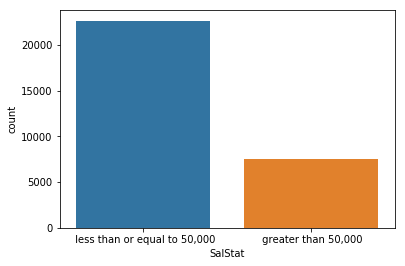

In [13]:
#########################################
#Frequency distribution of salary status
#########################################

SalStat=sns.countplot(data2['SalStat'])
"""
Note: 75% salary Status<=50000 and 25% salary status>50000
"""

'\nNote:people with age 25-40 age are high in frequency\n'

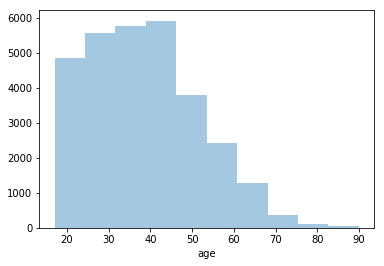

In [14]:
###########Histogram of Age###########################
sns.distplot(data2['age'],bins=10,kde=False)
"""
Note:people with age 25-40 age are high in frequency
"""


'\nNote: People with age 35-50 age salary status is >50000 \nand 25-35 age salary status <=50000\n'

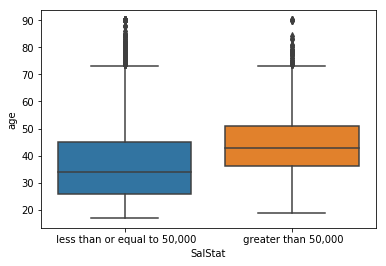

In [15]:
###########Box Plot- Age vs Salary Status ##################
sns.boxplot('SalStat','age',data=data2)
data2.groupby('SalStat')['age'].median()
"""
Note: People with age 35-50 age salary status is >50000 
and 25-35 age salary status <=50000
"""

SalStat             greater than 50,000   less than or equal to 50,000
JobType                                                               
 Federal-gov                   0.387063                       0.612937
 Local-gov                     0.294630                       0.705370
 Private                       0.218792                       0.781208
 Self-emp-inc                  0.558659                       0.441341
 Self-emp-not-inc              0.285714                       0.714286
 State-gov                     0.268960                       0.731040
 Without-pay                   0.000000                       1.000000


'\nNote: 56% of self-emp-inc jobtype people salary status >50000\nso we can avoid these people\n'

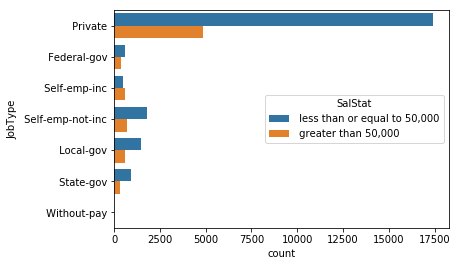

In [16]:
###########Bar Plot - job type vs Salary status
sns.countplot(y='JobType',hue='SalStat',data=data2)

jobtype_salstat=pd.crosstab(index=data2['JobType'],columns=data2['SalStat'],normalize='index')
print(jobtype_salstat)

"""
Note: 56% of self-emp-inc jobtype people salary status >50000
so we can avoid these people
"""  

SalStat         greater than 50,000   less than or equal to 50,000
EdType                                                            
 10th                      0.071951                       0.928049
 11th                      0.056298                       0.943702
 12th                      0.076923                       0.923077
 1st-4th                   0.039735                       0.960265
 5th-6th                   0.041667                       0.958333
 7th-8th                   0.062837                       0.937163
 9th                       0.054945                       0.945055
 Assoc-acdm                0.253968                       0.746032
 Assoc-voc                 0.263198                       0.736802
 Bachelors                 0.421491                       0.578509
 Doctorate                 0.746667                       0.253333
 HS-grad                   0.164329                       0.835671
 Masters                   0.564229                       0.43

'\nNote:people with doctorate,prof-school and masters are more \nlikely to earn above 50000 so we can avoid these people\n'

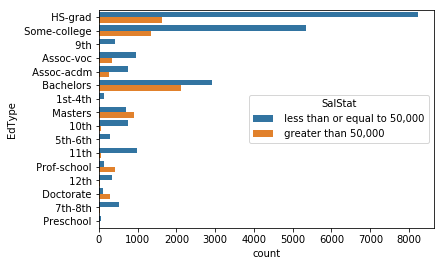

In [17]:
##########Bar Plot - Education vs Salary status
sns.countplot(y='EdType',hue='SalStat',data=data2)

jobtype_salstat=pd.crosstab(index=data2['EdType'],columns=data2['SalStat'],normalize='index')
print(jobtype_salstat)

"""
Note:people with doctorate,prof-school and masters are more 
likely to earn above 50000 so we can avoid these people
"""

SalStat              greater than 50,000   less than or equal to 50,000
occupation                                                             
 Adm-clerical                   0.133835                       0.866165
 Armed-Forces                   0.111111                       0.888889
 Craft-repair                   0.225310                       0.774690
 Exec-managerial                0.485220                       0.514780
 Farming-fishing                0.116279                       0.883721
 Handlers-cleaners              0.061481                       0.938519
 Machine-op-inspct              0.124619                       0.875381
 Other-service                  0.041096                       0.958904
 Priv-house-serv                0.006993                       0.993007
 Prof-specialty                 0.448489                       0.551511
 Protective-serv                0.326087                       0.673913
 Sales                          0.270647                       0

'\nNote:people with exec-managerial and prof-specialty are more \nlikely to earn above 50000 so we can avoid these people\n'

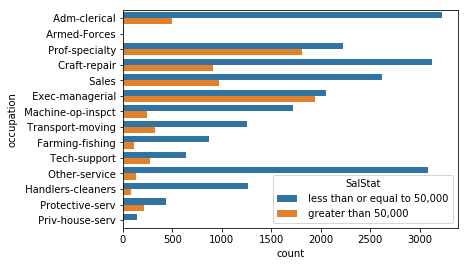

In [18]:
##########Bar Plot - occupation vs Salary status
sns.countplot(y='occupation',hue='SalStat',data=data2)

jobtype_salstat=pd.crosstab(index=data2['occupation'],columns=data2['SalStat'],normalize='index')
print(jobtype_salstat)
"""
Note:people with exec-managerial and prof-specialty are more 
likely to earn above 50000 so we can avoid these people
"""

C:\Users\Ravishankar\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


'\nNote: almost 92 % people with zero capital gain\n'

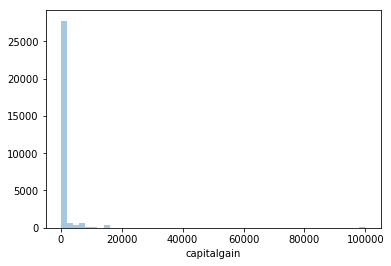

In [19]:
##########Histogram - Capital gain
sns.distplot(data2['capitalgain'],kde=False)

"""
Note: almost 92 % people with zero capital gain
"""

C:\Users\Ravishankar\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


'\nNote: almost 95 % people with zero capital loss\n'

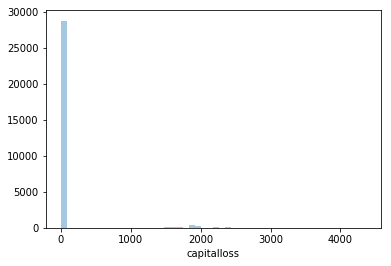

In [20]:
##########Histogram - Capital Loss
sns.distplot(data2['capitalloss'],kde=False)

"""
Note: almost 95 % people with zero capital loss
"""

'\nNote: people who work for 40-50 hr per weeks are make more than 50000\n'

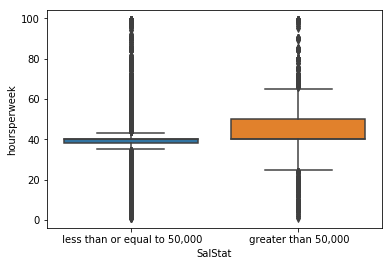

In [21]:
##########Boxplot - hour per week vs Salary status

sns.boxplot('SalStat','hoursperweek',data=data2)
data2.groupby('SalStat')['hoursperweek'].median()
"""
Note: people who work for 40-50 hr per weeks are make more than 50000
"""

In [22]:
#############################################
#Logistic Regression
############################################

#Reindexing the Salary Status names to 0 ,1
data2['SalStat']=data2['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})
print(data2['SalStat'])

0        0
1        0
2        1
3        0
4        0
5        0
6        0
7        0
9        0
10       1
11       1
12       1
13       1
14       0
15       0
16       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       1
27       1
28       1
30       0
31       0
32       0
        ..
31946    0
31947    0
31948    0
31949    0
31950    1
31951    0
31952    1
31953    0
31954    0
31955    0
31956    0
31957    0
31958    0
31959    1
31960    0
31961    0
31962    0
31963    0
31964    0
31965    1
31966    0
31969    0
31970    1
31971    0
31972    1
31973    0
31974    0
31975    0
31976    0
31977    0
Name: SalStat, Length: 30162, dtype: int64


C:\Users\Ravishankar\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [23]:
#Here we convert cetegorical variable to numerical value either 0 or 1
new_data=pd.get_dummies(data2,drop_first=True)

In [24]:
#Storing the columns names
columns_list=list(new_data.columns)
print(columns_list)

['age', 'capitalgain', 'capitalloss', 'hoursperweek', 'SalStat', 'JobType_ Local-gov', 'JobType_ Private', 'JobType_ Self-emp-inc', 'JobType_ Self-emp-not-inc', 'JobType_ State-gov', 'JobType_ Without-pay', 'EdType_ 11th', 'EdType_ 12th', 'EdType_ 1st-4th', 'EdType_ 5th-6th', 'EdType_ 7th-8th', 'EdType_ 9th', 'EdType_ Assoc-acdm', 'EdType_ Assoc-voc', 'EdType_ Bachelors', 'EdType_ Doctorate', 'EdType_ HS-grad', 'EdType_ Masters', 'EdType_ Preschool', 'EdType_ Prof-school', 'EdType_ Some-college', 'maritalstatus_ Married-AF-spouse', 'maritalstatus_ Married-civ-spouse', 'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Never-married', 'maritalstatus_ Separated', 'maritalstatus_ Widowed', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'occupation_ Priv-house-serv', 'occupation_ Prof-specialty', 'occupation_ Protective-s

In [25]:
#Seprating Input names from data

features=list(set(columns_list)-set(['SalStat']))
print(features)

['EdType_ Bachelors', 'EdType_ Assoc-acdm', 'EdType_ 5th-6th', 'EdType_ Prof-school', 'occupation_ Prof-specialty', 'race_ Asian-Pac-Islander', 'JobType_ Without-pay', 'EdType_ 9th', 'relationship_ Not-in-family', 'nativecountry_ Philippines', 'JobType_ Private', 'nativecountry_ Haiti', 'occupation_ Other-service', 'nativecountry_ Trinadad&Tobago', 'race_ White', 'nativecountry_ Poland', 'capitalgain', 'nativecountry_ France', 'EdType_ Some-college', 'occupation_ Handlers-cleaners', 'EdType_ Assoc-voc', 'EdType_ Doctorate', 'relationship_ Unmarried', 'nativecountry_ Guatemala', 'nativecountry_ India', 'JobType_ Self-emp-not-inc', 'relationship_ Own-child', 'maritalstatus_ Married-AF-spouse', 'nativecountry_ El-Salvador', 'race_ Other', 'occupation_ Sales', 'nativecountry_ China', 'JobType_ State-gov', 'nativecountry_ Puerto-Rico', 'maritalstatus_ Married-civ-spouse', 'nativecountry_ Vietnam', 'occupation_ Craft-repair', 'nativecountry_ Thailand', 'nativecountry_ Holand-Netherlands', 'E

In [26]:
#storing output values in Y
y=new_data['SalStat'].values
print(y)

[0 0 1 ... 0 0 0]


In [27]:
#Storing the values from input features
x=new_data[features].values
print(x)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


In [28]:
#Spliting the data into train and test
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3, random_state=0)


In [29]:
#Make a instance of model
logistic=LogisticRegression()

In [30]:
#Fitting the values for x and Y
logistic.fit(train_x,train_y)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [31]:
#Predict from test Data
prediction=logistic.predict(test_x)
print(prediction)

[0 0 0 ... 0 0 0]


In [32]:
#confusion matrix
confusion_matrix=confusion_matrix(test_y,prediction)
print(confusion_matrix)

[[6338  485]
 [ 941 1285]]


In [33]:
#Calculating the accuracy
accuracy_score=accuracy_score(test_y,prediction)
print(accuracy_score)


0.8424135263565035


In [34]:
##########################################################
################## KNN- K Nearest Neighbors classifier
##########################################################

#importing the KNN library
from sklearn.neighbors import KNeighborsClassifier

In [35]:
#Make a instance of model
KNN_classifier=KNeighborsClassifier(n_neighbors=5)

In [36]:
#Fitting the values for x and Y
KNN_classifier.fit(train_x,train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [37]:
#Predict from test Data
prediction=KNN_classifier.predict(test_x)
print(prediction)

[0 0 0 ... 1 0 0]


In [38]:
#confusion matrix
confusion_matrix=confusion_matrix(test_y,prediction)
confusion_matrix

TypeError: 'numpy.ndarray' object is not callable

In [ ]:
#Calculating the accuracy
accuracy_score=accuracy_score(test_y,prediction)
accuracy_score

In [ ]:
print('Misclassified sample : %d' % (test_y!=prediction).sum())

"""
Effect of K  value on classifier
"""

In [ ]:
Misclassified_sample=[]
#calculating error for k values b/w 1 to 20
for i in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_x,train_y)
    pred_i=knn.predict(test_x)
    Misclassified_sample.append((test_y!=pred_i).sum())
    
print(Misclassified_sample)


##################################################
#####################END- Script
##################################################


In [ ]:
print(Misclassified_sample)